# Naural network hidden layers activation embeding

#### In this notebook we will use fully connected neural network for a classification task to improve visualizations algorithm from previous classes.

In the fully connected neural network, the output of each layer is computed using the activations from the previous one. In neural network training process, each successive layer learns to extract features from data with increasingly higher levels of abstraction. In this exercise, instead of directly visualizing data, we'll try to visualize the activation of hidden layers in neural networks. Using this idea, we can improve the process of data visualization, and on the other hand, see how processing this data looks like by a neural network.

pip install tensorflow==2.15t

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation

from tensorflow.keras.models import Sequential

#from keras.layers.core import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras import backend as K

from keras.datasets import mnist
import keras.utils  as np_utils
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

In [16]:
nb_classes = 10

The dropout layers have the very specific function to drop out a random set of activations in that layers by setting them to zero in the forward pass. Simple as that.
It allows to avoid overfitting but has to be used only at training time and not at test time.

In [17]:
# set dropout rate - fractions of neurons to drop

dropout = 0.5

In [18]:
# build very simple neural network with 2 hidden layers

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(dropout))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

C:\Users\KlaudiaDyl\miniforge3\envs\minifold\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# The binary_crossentropy loss expects a one-hot-vector as input,
# so we apply the to_categorical function from keras.utilis to convert integer labels to one-hot-vectors.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [22]:
# split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5/6)

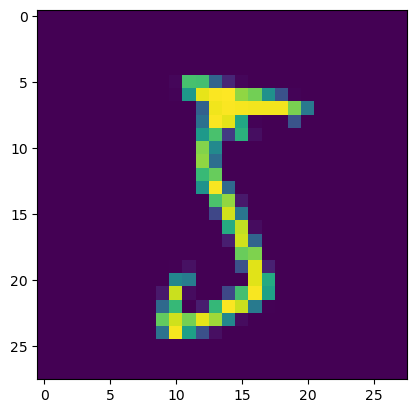

In [23]:
# show example digit
plt.imshow(X_train[0].reshape(28, 28))

In [24]:
# When we have defined and compiled the model, it can be trained using the fit function.
# We also use validation dataset to monitor validation loss and accuracy.

network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6460 - loss: 1.0685 - val_accuracy: 0.9353 - val_loss: 0.2108
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9084 - loss: 0.3244 - val_accuracy: 0.9551 - val_loss: 0.1535
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9291 - loss: 0.2549 - val_accuracy: 0.9621 - val_loss: 0.1301
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9410 - loss: 0.2130 - val_accuracy: 0.9671 - val_loss: 0.1128
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9485 - loss: 0.1848 - val_accuracy: 0.9702 - val_loss: 0.1034
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1764 - val_accuracy: 0.9704 - val_loss: 0.0994
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1579 - val_accuracy: 0.9713 - val_loss: 0.0944
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9586 - loss: 0.1477 - val_accuracy: 0.

In [25]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

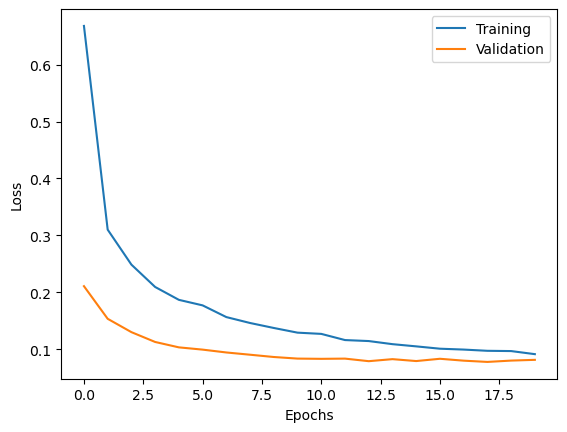

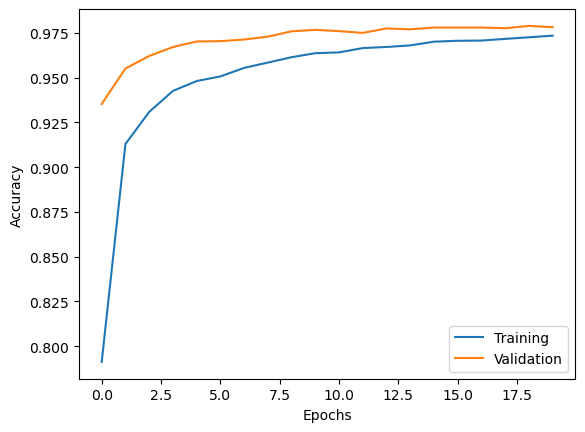

In [26]:
# fit function return keras.callbacks.History object which contains the entire history
# of training/validation loss, accuracy and other metrices for each epoch.
# We can therefore plot the behaviour of loss and accuracy during the training phase.

plot_history(network_history)

Usunięcie Dropout prowadzi do zjawiska przetrenowania (dla danych treningowych wartość funkcji straty maleje w miarę zwiększania liczby epok, a dokładność modelu wzrasta). Natomiast dla danych walidacyjnych, te parametry zmieniają się tylko nieznacznie, a w niektórych przypadkach możemy nawet zauważyć wzrost wartości funkcji straty oraz spadek dokładności. Wspomniane zjawisko wskazuje na nadmierne dopasowanie do danych treningowych kosztem generalizacji.

In [27]:
# Keras Model have summary function, that print data about model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 654,176 (2.50 MB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 436,118 (1.66 MB)

In [28]:
import tensorflow as tf

# Załóżmy, że model to już zdefiniowany model sieci neuronowej w tf.keras

# Tworzenie modelu pomocniczego do pobierania aktywacji z wybranych warstw
# Tutaj zakładamy, że chcesz aktywacje z warstw o indeksach 0, 2, i 4
intermediate_model = tf.keras.Model(inputs=model.inputs,
                                    outputs=[model.layers[0].output, 
                                             model.layers[2].output, 
                                             model.layers[4].output])

# Używamy tego modelu do przewidzenia i pobrania aktywacji dla X_train
# Upewnij się, że X_train jest odpowiednio przetworzone i gotowe do użycia z modelem
layer1_output, layer2_output, layer3_output = intermediate_model.predict(X_train)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [16]:
train_ids = [np.arange(len(Y_train))[Y_train[:,i] == 1] for i in range(10)]

Wizualizacja ilustruje proces przepływu różnych próbek danych wejściowych przez poszczególne warstwy modelu. Każdy piksel  symbolizuje pojedynczy neuron w danej warstwie, a jego kolor odzwierciedla wartość aktywacji. Intensywność koloru informuje o stopniu aktywacji neuronu, pozwalając zrozumieć, jak poszczególne cechy wejściowe są interpretowane i przekształcane przez model na każdym kroku analizy.

The 2 graphs below are not directly related to the topic of the exercise, but they visualize very well how neuron activation actives work and for explanation are included.

In [17]:
%%capture
%matplotlib inline

# this animation shows what the example number 5 looks like
# and what activations of neurons look in hidden layers of the neural network



# digit to be plotted
digit = 5

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
    
ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    
        
def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(X_train[train_ids[digit][id]].reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(layer1_output[train_ids[digit][id]].reshape((16,16)), animated=True)
    layer2_plot = ax3.imshow(layer2_output[train_ids[digit][id]].reshape((8,8)), animated=True)
    output_plot = ax4.imshow(np.append(layer3_output[train_ids[digit][id]], 
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, layer2_plot, output_plot,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [18]:
ani

In most cases the same subset of neurons fires, while other neurons remain quiescent. This is much more obvious in the second hidden layer than in the first hidden layer and can be interpreted as the first layer pre-processesing the pixel data, while the second layer deals with pattern recognition.

This effect is mainly caused by regularization forced by dropout. Dropout generally leads to the sparse weight matrices where a significant part of connection weights are close to 0. Insignificant weights are suppressed.


Optional, nonobligatory task:
You can easily see how the visualizations change if you comment lines responsible for the dropout "model.add(Dropout(dropout))".
Remember to change "get_layer_output", because after removing the dropout, the dense layers will have indexes: 0,1,2.


In [19]:
%%capture
%matplotlib inline


# Let's check the similarity in behavior for frames showing the same digit by looking at the ensemble properties.
# In this case, ensemble properties refers to how the neurons behave on average
# for a large number of frames showing the same digit.

# digit to be plotted
digit = 6

# numbers of frames to be summed over
n = np.append([1], np.linspace(5, 100, 20, dtype=int))

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# add a counter indicating the number of frames used in the summation
counter = ax1.text(1, 2, 'n={}'.format(0), color='white', fontsize=16, animated=True)

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
    
ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    
        
def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(np.sum(X_train[train_ids[digit][:id]], axis=0).reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(np.sum(layer1_output[train_ids[digit][:id]], axis=0).reshape((16,16)), animated=True)
    layer2_plot = ax3.imshow(np.sum(layer2_output[train_ids[digit][:id]], axis=0).reshape((8,8)), animated=True)
    output_plot = ax4.imshow(np.append(np.sum(layer3_output[train_ids[digit][:id]], axis=0), 
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    counter.set_text('n={}'.format(id))
    return digit_plot, layer1_plot, layer2_plot, output_plot, counter,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [20]:
ani

After summing up the responses of as little as 20-30 frames, the pattern in the second hidden layer is almost static. After combining about 70-80 frames, also the pattern in the first hidden layer appears static. This supports the idea that only a subset of all neurons is involved in the recognition of individual digits.

Especially the above plot is important when we think about use of neural networks for data visualization. We can clearly see that the activation generated by examples belonging to the same class are less chaotic than the examples themselves, therefore their visualization should give a more clustered structure

# Task 1

- Project a MNIST training part into 2-dimensional space using t-SNE, TriMAP, PaCMAP and UMAP.

- Use layer1_output and layer2_output to project first and second hidden layers of neural network into a 2-dimensional space. Also divided into a test and training set, use the same methods as the point above.

- Also visualize the test part.

- Try to use 2-dimensional projection for classification task.

- Use embeddings lerned on raw train data (and also on hidden activations of train data) to transform test data (and also hidden activations of test data) into 2-dimensional space.

- Use the k-nearest neighbors algorithm to classify transformed points from the test set. Use the KNN algorithm in which you will use points from the training set as a neighbor with known class assignment. Because t-SNE is a non-linear, non-parametric embedding you cant use already learned t-SNE to transform new points into the existing embedded space. So for this part, use only UMAP with have fit_transform method (learn manifold) and also transform (only project new data to existing manifold). Try with few values of n_neighbors e.g [3, 5, 10]

- Estimate the accuracy of classification using this approach. Use all 3 layers (raw data, 1 hidden layer, 2 hidden layer) and few values of n_neighbors

In [24]:
from sklearn.manifold import TSNE
import umap

In [25]:
tsne = TSNE(n_components=2,learning_rate='auto', init='random')
umap =  umap.UMAP(n_components=2)

In [26]:
X_tsne = tsne.fit_transform(X_train)
X_umap = umap.fit_transform(X_train)

X_tsne_test = tsne.fit_transform(X_test)
X_umap_test = umap.fit_transform(X_test)

In [27]:
# to get hidden activations of test data use:
test_layer1_output, test_layer2_output, test_layer3_output = intermediate_model.predict([X_test])

# maybe you would like to inverse of "to_categorical" function. use np.argmax(to_categorical(x, k), axis=1) or K.argmax.
Y_train = np.argmax(Y_train,axis=1)
Y_test = np.argmax(Y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
X_tsne_layer1 = tsne.fit_transform(layer1_output)
X_umap_layer1 = umap.fit_transform(layer1_output)

X_tsne_layer2 = tsne.fit_transform(layer2_output)
X_umap_layer2 = umap.fit_transform(layer2_output)

In [29]:
X_tsne_test_layer1 = tsne.fit_transform(test_layer1_output)
X_umap_test_layer1 = umap.fit_transform(test_layer1_output)

X_tsne_test_layer2 = tsne.fit_transform(test_layer2_output)
X_umap_test_layer2 = umap.fit_transform(test_layer2_output)

Text(0.5, 1.0, 't-SNE - layer 2')

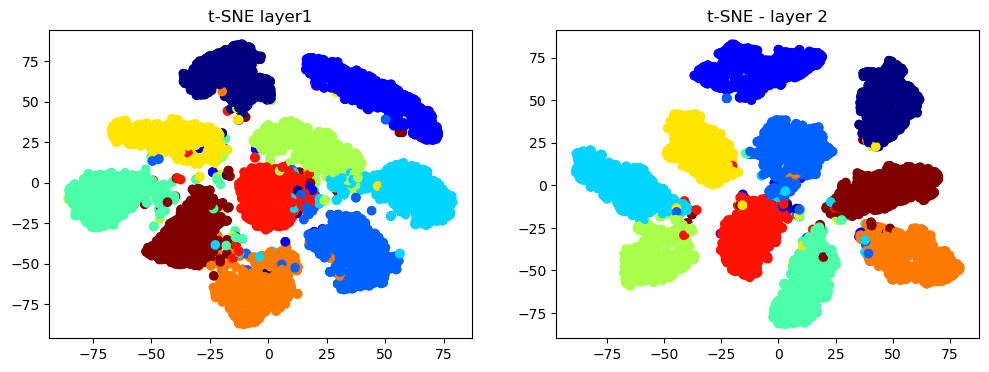

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(X_tsne_test_layer1[:,0], X_tsne_test_layer1[:,1], c=np.array(Y_test).astype('int'), cmap='jet')
axes[0].set_title('t-SNE layer1')
axes[1].scatter(X_tsne_test_layer2[:,0], X_tsne_test_layer2[:,1], c=np.array(Y_test).astype('int'), cmap='jet')
axes[1].set_title('t-SNE - layer 2')

Text(0.5, 1.0, 'UMAP - layer 2')

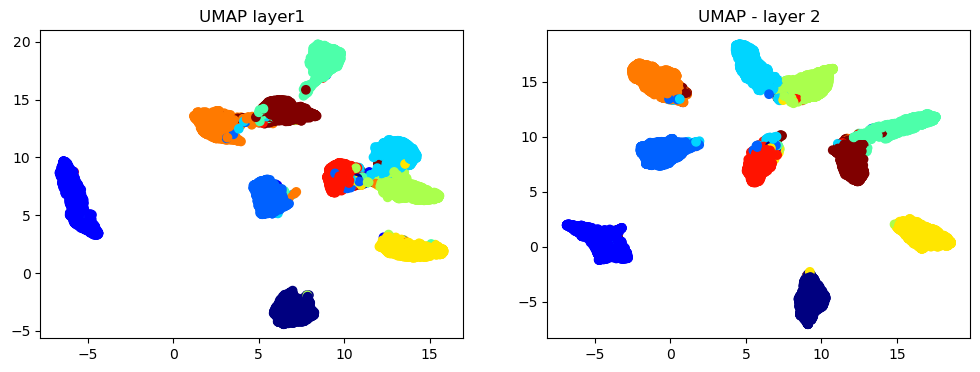

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(X_umap_test_layer1[:,0], X_umap_test_layer1[:,1], c=np.array(Y_test).astype('int'), cmap='jet')
axes[0].set_title('UMAP layer1')
axes[1].scatter(X_umap_test_layer2[:,0], X_umap_test_layer2[:,1], c=np.array(Y_test).astype('int'), cmap='jet')
axes[1].set_title('UMAP - layer 2')

In [32]:
from sklearn.svm import SVC

svm_umap = SVC(kernel='rbf', C=1.0, random_state=42)
svm_umap.fit(X_umap, Y_train)

svm_tsne = SVC(kernel='rbf', C=1.0, random_state=42)
svm_tsne.fit(X_tsne, Y_train)

SVC(random_state=42)

In [33]:
test_embeddings = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
X_umap_emb = umap.fit_transform(test_embeddings)

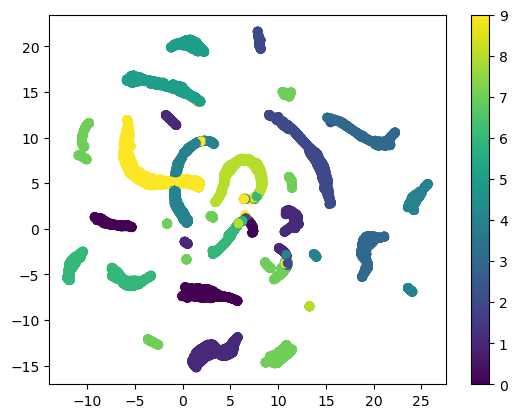

In [35]:
# raw data embedings visualizations
plt.scatter(X_umap_emb[:, 0], X_umap_emb[:, 1], c=np.array(Y_test).astype('int'))
plt.colorbar()
plt.show()

In [37]:
X_emb_layer1, X_emb_layer2, X_emb_layer3 = intermediate_model.predict([X_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
umap_emb_layer1 = umap.fit_transform(X_emb_layer1)
umap_emb_layer2 = umap.fit_transform(X_emb_layer2)

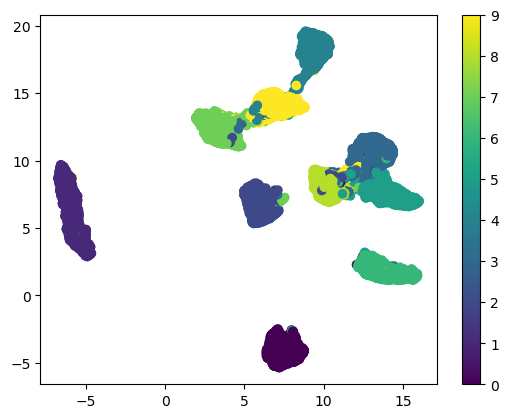

In [39]:
# hidden layer 1 embedings visualizations
plt.scatter(umap_emb_layer1[:, 0], umap_emb_layer1[:, 1], c=np.array(Y_test).astype('int'))
plt.colorbar()
plt.show()

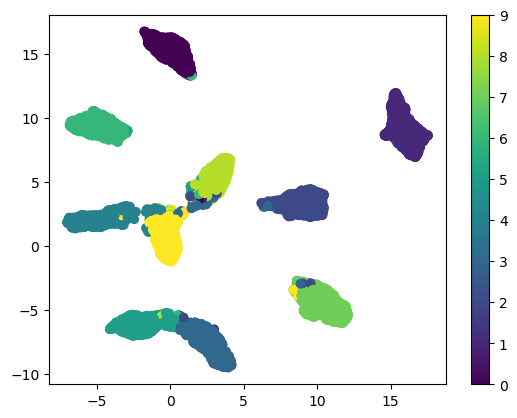

In [40]:
# hidden layer 2 embedings visualizations
plt.scatter(umap_emb_layer2[:, 0], umap_emb_layer2[:, 1], c=Y_test)
plt.colorbar()
plt.show()

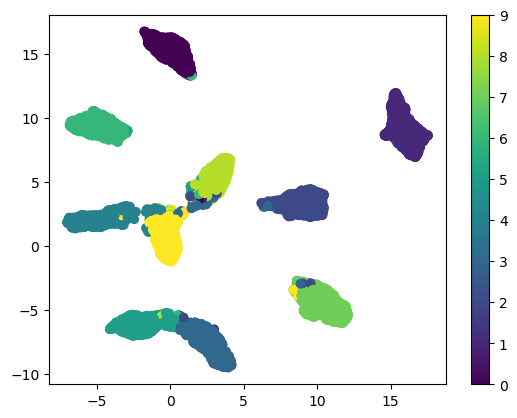

In [41]:
# hidden layer 2 embedings visualizations
plt.scatter(umap_emb_layer2[:, 0], umap_emb_layer2[:, 1], c=Y_test)
plt.colorbar()
plt.show()

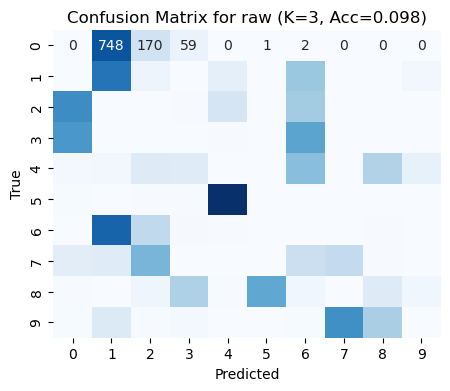

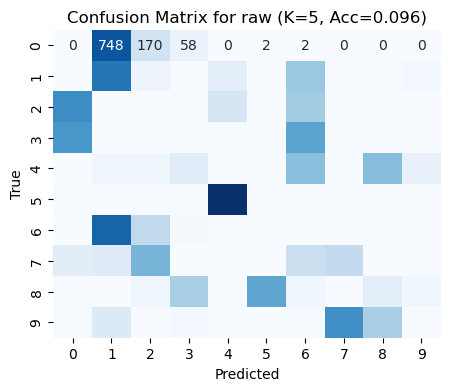

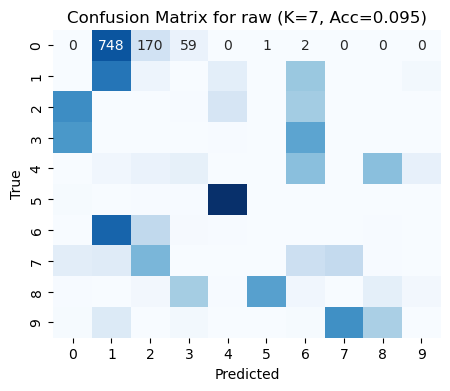

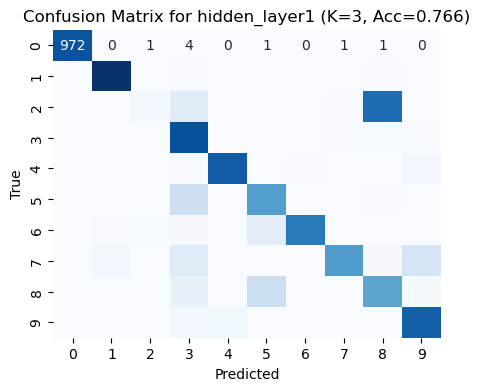

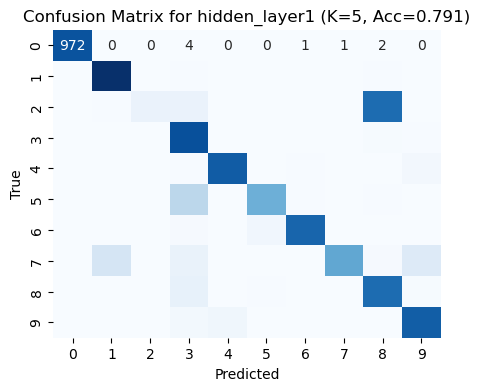

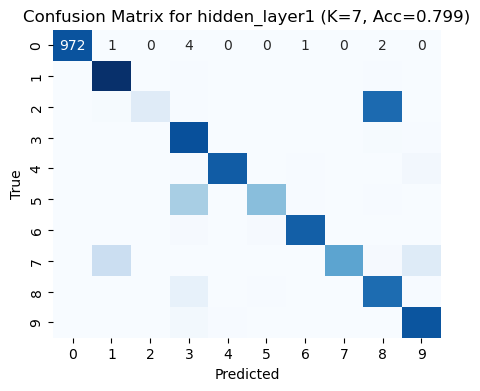

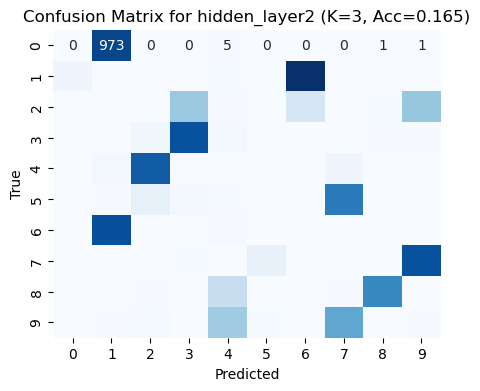

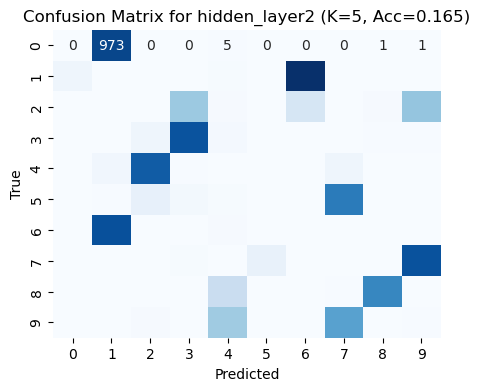

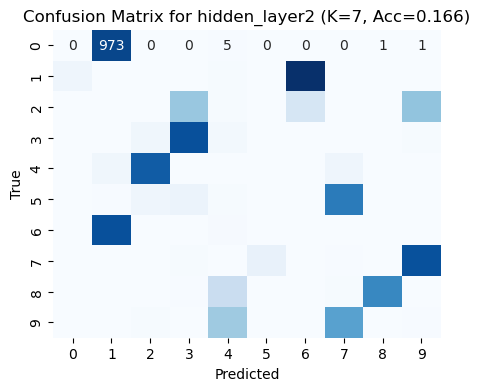

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

approaches = ['raw', 'hidden_layer1', 'hidden_layer2']
for approach in approaches:
    if approach == 'raw':
        X_train = X_umap
        X_test = X_umap_emb
    elif approach == 'hidden_layer1':
        X_train = X_umap_layer1
        X_test = umap_emb_layer1
    elif approach == 'hidden_layer2':
        X_train = X_umap_layer2
        X_test = umap_emb_layer2
    
    for n_neighbors in [3, 5, 7]:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, Y_train)
        y_test_pred = knn.predict(X_test)
        accuracy = accuracy_score(Y_test, y_test_pred)
        cm = confusion_matrix(Y_test, y_test_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for {approach} (K={n_neighbors}, Acc={accuracy:.3f})')
        plt.show()


# Task 2

Repeate the above training procedures and visualizations for FMNIST (or any other dataset of your choice)

In [29]:
import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import umap.umap_ as umap


import umap

from sklearn.datasets import fetch_openml

In [30]:
from sklearn.manifold import TSNE
import umap

In [31]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5/6)

In [17]:
tsne = TSNE(n_components=2,learning_rate='auto', init='random')
umap =  umap.UMAP(n_components=2)

In [18]:
X_tsne = tsne.fit_transform(X_train)
X_umap = umap.fit_transform(X_train)

X_tsne_test = tsne.fit_transform(X_test)
X_umap_test = umap.fit_transform(X_test)

In [35]:
# to get hidden activations of test data use:
test_layer1_output, test_layer2_output, test_layer3_output = intermediate_model.predict([X_test])

# maybe you would like to inverse of "to_categorical" function. use np.argmax(to_categorical(x, k), axis=1) or K.argmax.
Y_train = np.argmax(Y_train,axis=1)
Y_test = np.argmax(Y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [36]:
X_tsne_layer1 = tsne.fit_transform(layer1_output)
X_umap_layer1 = umap.fit_transform(layer1_output)

In [37]:
X_tsne_layer2 = tsne.fit_transform(layer2_output)
X_umap_layer2 = umap.fit_transform(layer2_output)

In [38]:
X_tsne_test_layer1 = tsne.fit_transform(test_layer1_output)
X_umap_test_layer1 = umap.fit_transform(test_layer1_output)

X_tsne_test_layer2 = tsne.fit_transform(test_layer2_output)
X_umap_test_layer2 = umap.fit_transform(test_layer2_output)

Text(0.5, 1.0, 't-SNE - layer 2')

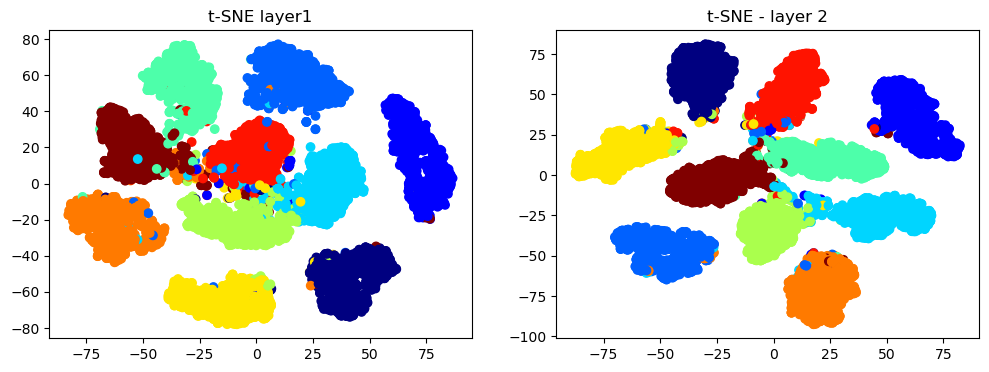

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(X_tsne_test_layer1[:,0], X_tsne_test_layer1[:,1], c=np.array(Y_test).astype('int'), cmap='jet')
axes[0].set_title('t-SNE layer1')
axes[1].scatter(X_tsne_test_layer2[:,0], X_tsne_test_layer2[:,1], c=np.array(Y_test).astype('int'), cmap='jet')
axes[1].set_title('t-SNE - layer 2')

Text(0.5, 1.0, 'UMAP - layer 2')

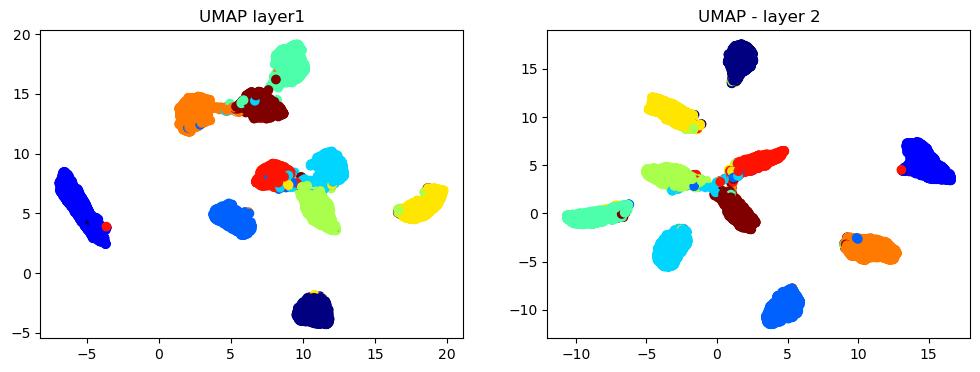

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(X_umap_test_layer1[:,0], X_umap_test_layer1[:,1], c=np.array(Y_test).astype('int'), cmap='jet')
axes[0].set_title('UMAP layer1')
axes[1].scatter(X_umap_test_layer2[:,0], X_umap_test_layer2[:,1], c=np.array(Y_test).astype('int'), cmap='jet')
axes[1].set_title('UMAP - layer 2')

In [41]:
from sklearn.svm import SVC

svm_umap = SVC(kernel='rbf', C=1.0, random_state=42)
svm_umap.fit(X_umap, Y_train)

svm_tsne = SVC(kernel='rbf', C=1.0, random_state=42)
svm_tsne.fit(X_tsne, Y_train)

SVC(random_state=42)

In [42]:
test_embeddings = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [44]:
X_umap_emb = umap.fit_transform(test_embeddings)

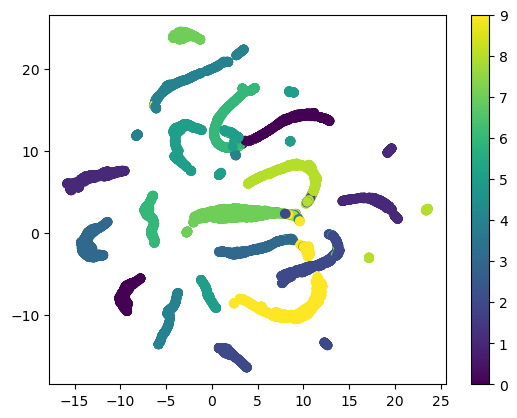

In [45]:
# raw data embedings visualizations
plt.scatter(X_umap_emb[:, 0], X_umap_emb[:, 1], c=np.array(Y_test).astype('int'))
plt.colorbar()
plt.show()

In [46]:
X_emb_layer1, X_emb_layer2, X_emb_layer3 = intermediate_model.predict([X_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
umap_emb_layer1 = umap.fit_transform(X_emb_layer1)
umap_emb_layer2 = umap.fit_transform(X_emb_layer2)

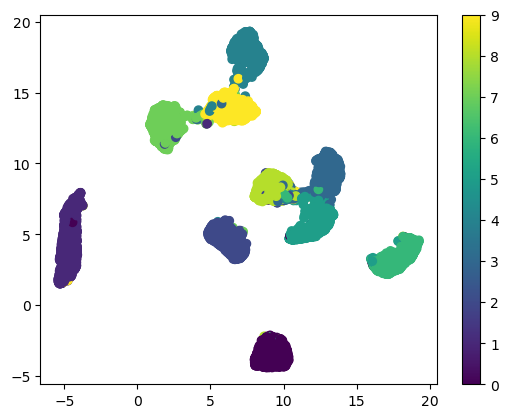

In [48]:
# hidden layer 1 embedings visualizations
plt.scatter(umap_emb_layer1[:, 0], umap_emb_layer1[:, 1], c=np.array(Y_test).astype('int'))
plt.colorbar()
plt.show()

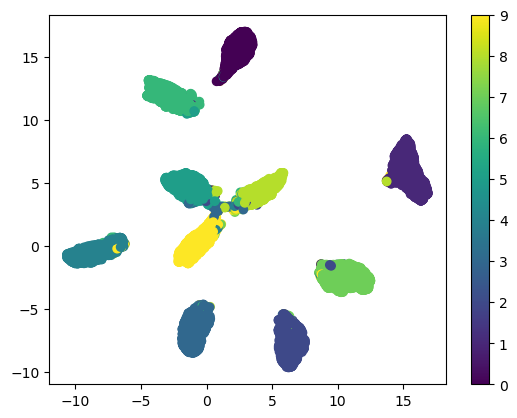

In [49]:
# hidden layer 2 embedings visualizations
plt.scatter(umap_emb_layer2[:, 0], umap_emb_layer2[:, 1], c=Y_test)
plt.colorbar()
plt.show()

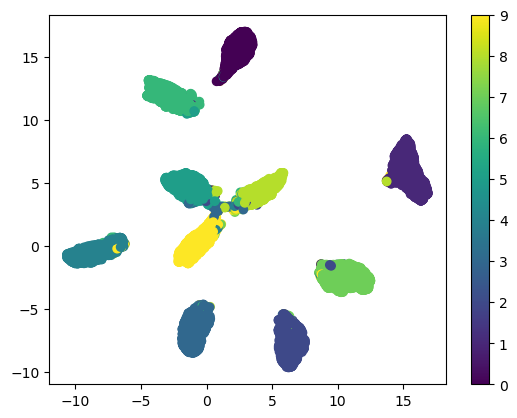

In [51]:
# hidden layer 2 embedings visualizations
plt.scatter(umap_emb_layer2[:, 0], umap_emb_layer2[:, 1], c=Y_test)
plt.colorbar()
plt.show()

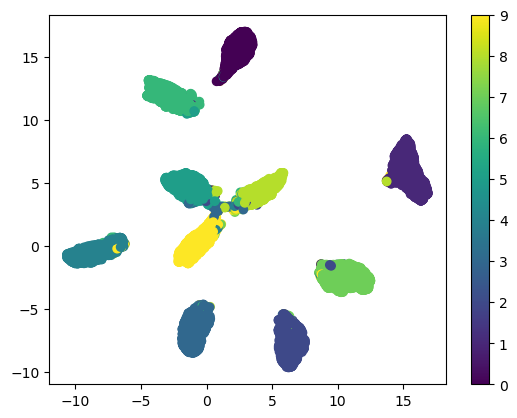

In [50]:
# hidden layer 2 embedings visualizations
plt.scatter(umap_emb_layer2[:, 0], umap_emb_layer2[:, 1], c=Y_test)
plt.colorbar()
plt.show()

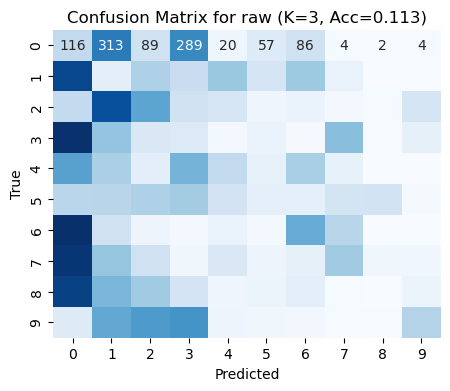

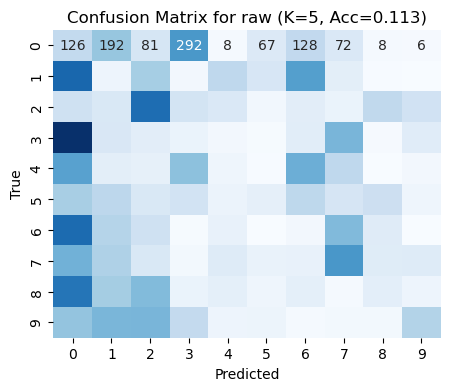

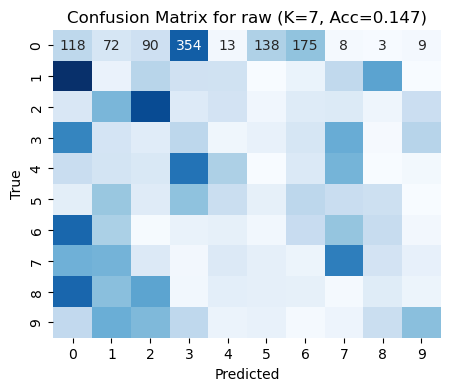

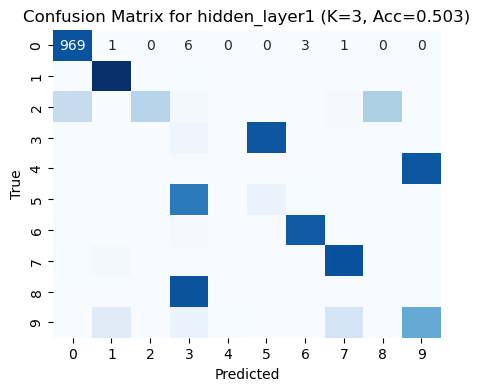

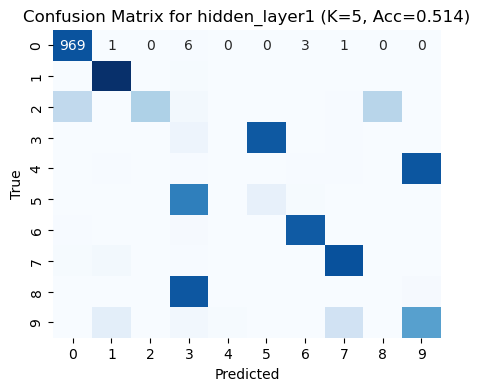

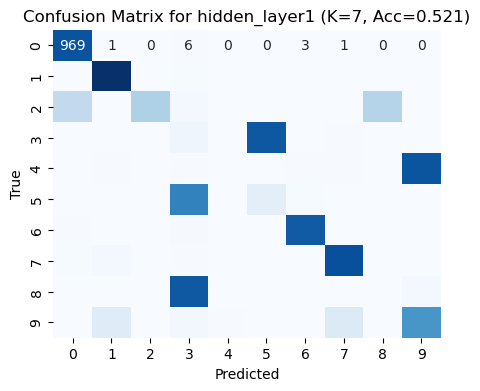

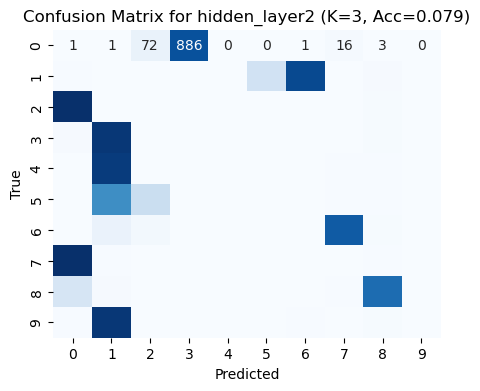

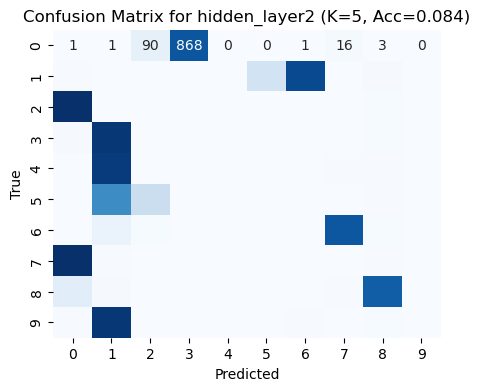

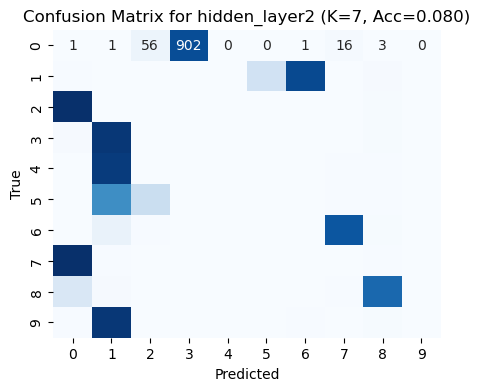

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

approaches = ['raw', 'hidden_layer1', 'hidden_layer2']
for approach in approaches:
    if approach == 'raw':
        X_train = X_umap
        X_test = X_umap_emb
    elif approach == 'hidden_layer1':
        X_train = X_umap_layer1
        X_test = umap_emb_layer1
    elif approach == 'hidden_layer2':
        X_train = X_umap_layer2
        X_test = umap_emb_layer2
    
    for n_neighbors in [3, 5, 7]:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, Y_train)
        y_test_pred = knn.predict(X_test)
        accuracy = accuracy_score(Y_test, y_test_pred)
        cm = confusion_matrix(Y_test, y_test_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for {approach} (K={n_neighbors}, Acc={accuracy:.3f})')
        plt.show()
